## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [157]:
perf_df = pd.read_csv("students-data.csv",delimiter=';')
perf_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [158]:
perf_df['number'] = perf_df.index
perf_df.set_index(keys= 'number', inplace=True)
perf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [159]:
def comparator_func(n):
    
    if (n==1):
        return 1
    elif (n==2):
        return 2
    else:
        return 4

  
perf_df["failures"]= perf_df["failures"].apply(comparator_func)

In [160]:
perf_df.groupby(["failures"]).count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
failures,,,,,,,,,,,,,,,,,,,,,
1,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
2,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4,328,328,328,328,328,328,328,328,328,328,...,328,328,328,328,328,328,328,328,328,328


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [161]:
perf_df.select_dtypes(object, np.number)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [162]:
columns = perf_df.select_dtypes(np.number, object)
num_Indep = list(columns)
perf_df[num_Indep].var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       1.097179
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [163]:
#drop_col = np.where(perf_df[num_Indep].var() < 1.0, perf_df.columns[])
#list_dropCol = list(perf_df.columns[drop_col])
#list(list_dropCol)
#print(list_dropCol)
#perf_df.drop(list_dropCol, axis =1, inplace=True)
#perf_df.info()
drop_col = ['traveltime', 'studytime', 'famrel', 'freetime', 'Dalc']
perf_df.drop(drop_col, axis=1, inplace=True)

In [164]:
perf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 28 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [165]:
from sklearn import preprocessing

cat_columns = list(perf_df.select_dtypes(object, np.number))
print(cat_columns)
label_En = preprocessing.LabelEncoder()
perf_df[cat_columns] = perf_df[cat_columns].apply(label_En.fit_transform)
perf_df.head()

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [166]:
perf_df['G3'] = np.where(perf_df['G3'] >= 10, 1, 0)
perf_df['G2'] = np.where(perf_df['G2'] >= 10, 1, 0)
perf_df['G1'] = np.where(perf_df['G1'] >= 10, 1, 0)
perf_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [167]:
arr_value = perf_df.values
X = arr_value[:,0:27]
y = arr_value[:,27:28]

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

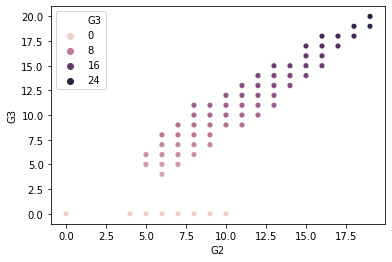

In [33]:
#This cell must be executed before the encoding the columns "G1 - G3"
sns.scatterplot(x='G2', y='G3',hue='G3',data=perf_df)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

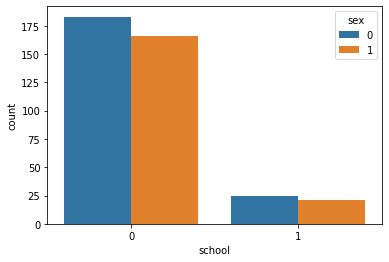

In [168]:
sns.countplot(x='school', hue='sex',data=perf_df)

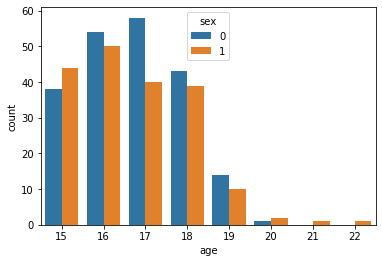

In [169]:
sns.countplot(x='age', hue='sex', data= perf_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 7)
print(X_train)
print(X_test)

[[ 0  0 18 ...  4  0  0]
 [ 0  0 17 ...  0  1  1]
 [ 0  1 16 ...  0  0  0]
 ...
 [ 0  0 16 ... 14  0  0]
 [ 0  1 17 ...  4  1  1]
 [ 0  1 17 ...  4  1  0]]
[[ 0  1 18 ... 13  1  1]
 [ 0  0 17 ... 23  1  1]
 [ 0  1 17 ...  2  1  1]
 ...
 [ 0  0 15 ... 10  0  0]
 [ 0  0 16 ...  4  0  1]
 [ 1  0 17 ...  4  1  1]]


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [174]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("Test-score:" ,model_score)
model_score = model.score(X_train, y_train)
print("Train-score:", model_score)
print(metrics.confusion_matrix(y_test, y_predict))

Test-score: 0.9191919191919192
Train-score: 0.9121621621621622
[[21  5]
 [ 3 70]]


C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
print(metrics.f1_score(y_predict, y_test))
print(metrics.classification_report(y_test, y_predict))

0.9459459459459458
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.93      0.96      0.95        73

    accuracy                           0.92        99
   macro avg       0.90      0.88      0.89        99
weighted avg       0.92      0.92      0.92        99



# Naive bayes with Iris data

### Import Iris.csv

In [176]:
from sklearn.naive_bayes import GaussianNB

In [177]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [178]:
iris_df.shape

(150, 5)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [179]:
arr_Iris = iris_df.values
X_iris = arr_value[:,0:4]
y_iris = arr_value[:,4]


In [180]:
print(X)
print(y)

[[ 0  0 18 ...  6  0  0]
 [ 0  0 17 ...  4  0  0]
 [ 0  0 15 ... 10  0  0]
 ...
 [ 1  1 21 ...  3  1  0]
 [ 1  1 18 ...  0  1  1]
 [ 1  1 19 ...  5  0  0]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]

### Find the distribution of target variable (Class)

In [181]:
iris_df.groupby(['Class']).count()
#The data is equally distributed

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


### Plot the distribution of target variable using histogram

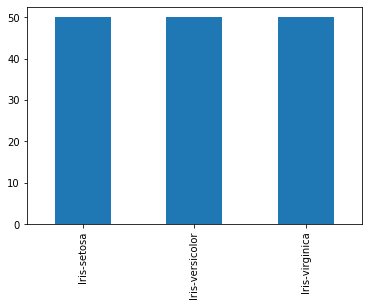

In [101]:
pd.value_counts(iris_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

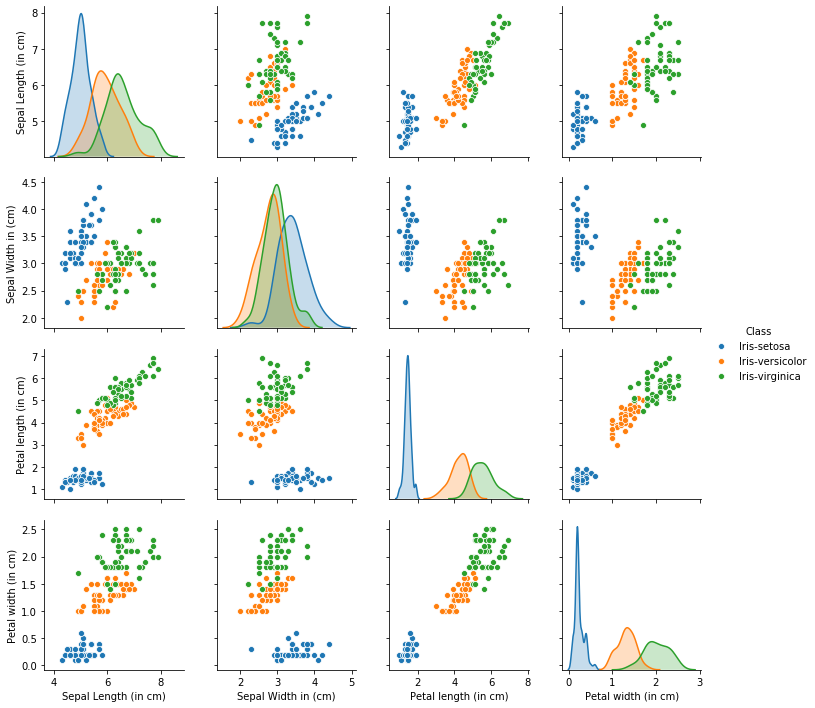

In [102]:
sns.pairplot(data=iris_df, diag_kind='kde', hue='Class')

In [182]:
#Class "Iris-setosa" can be easily seperable as there is no overlapping for features petal length
# and petal width
#Different classes in general are well seperated.


### Summary Statistics and explain insights for at least 2 variables

In [0]:
#Petal length and Petal width are very promising features as the classes are well seperated,wrt
#these featues and the distribution and means not overlapped

### Correlation among all variables and give your insights

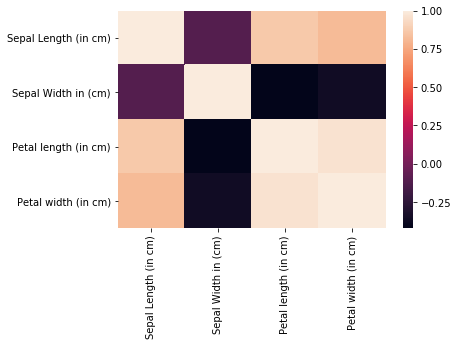

In [184]:
sns.heatmap(iris_df.corr())
#Sepal width is not a good feature to predict the Class type as the corelation is weak.
#However Petal length and Petal width have very high corelation and therefore are very good feature
# for predicting the Class type. Please note you can take either of them
#Sepal length is also a promising feature and should be included in the prediction

### Split data in Training and Validation in 80:20

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,test_size = 0.20,random_state = 7)

### Do Feature Scaling

In [187]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [188]:
model_bayes = GaussianNB()
model_bayes.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [189]:
predicted = model_bayes.predict(X_test_scaled)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [190]:
model_score = model_bayes.score(X_train_scaled, y_train)
print("Train-accuracy:", model_score)
model_score = model_bayes.score(X_test_scaled, y_test)
print("Test-accuracy", model_score)

Train-accuracy: 0.7278481012658228
Test-accuracy 0.6582278481012658


In [191]:
print(metrics.confusion_matrix(y_test,predicted))

[[51  2]
 [25  1]]
